# ROC-AUC

# ROC

When you have a **binary classification** problem, the ROC is a good way to decide what probability threshold you should use when making your predictions. 

Why? Because it let's you see what happens to your **True Positive Rate** and your **False Positive Rate** when you adjust that threshold.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [ ]:
data = load_breast_cancer()

In [ ]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = pd.Series(data['target'], name='diagnosis')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

# Split our data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate my model
log_model = LogisticRegression()

# Fit my model
log_model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Baseline
y.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

In [ ]:
print('training acc:', log_model.score(X_train, y_train))
print('validation acc:', log_model.score(X_val, y_val))

training acc: 0.9494505494505494
validation acc: 0.9649122807017544


# Check ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = log_model.predict_proba(X_val)

In [ ]:
print(type(y_pred_prob))
print(y_pred_prob.shape)
print(y_pred_prob[:5, :])

<class 'numpy.ndarray'>
(114, 2)
[[1.20947536e-01 8.79052464e-01]
 [9.99999988e-01 1.17333832e-08]
 [9.93036853e-01 6.96314716e-03]
 [4.91436621e-03 9.95085634e-01]
 [1.83766426e-03 9.98162336e-01]]


In [ ]:
y_pred_probab = log_model.predict_proba(X_val)[:, -1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probab)

pd.DataFrame({
  'False Positive Rate': fpr,
  'True Positive Rate': tpr,
  'Threshold': thresholds          
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.999747e+00
1,0.000000,0.014085,9.997471e-01
2,0.000000,0.957746,8.790525e-01
3,0.046512,0.957746,8.288580e-01
4,0.046512,0.985915,7.137608e-01
5,0.116279,0.985915,4.588987e-01
6,0.116279,1.000000,2.429520e-01
7,1.000000,1.000000,6.287083e-26


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(max_depth=1)
dtc_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc_model.score(X_val, y_val)

0.8947368421052632

In [ ]:
y_pred_prob_tree = dtc_model.predict_proba(X_val)[:, -1]

fpr2, tpr2, thresholds2 = roc_curve(y_val, y_pred_prob_tree)

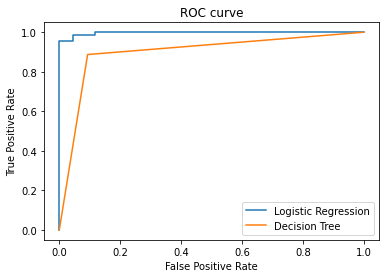

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Decision Tree')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [ ]:
print('logistic', roc_auc_score(y_val, y_pred_probab))
print('tree', roc_auc_score(y_val, y_pred_prob_tree))

logistic 0.9970520799213888
tree 0.8971503439240094
